In [1]:
# Import Dependencies
import pandas as pd
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px
from stats_can import StatsCan
import dash_bootstrap_components as dbc
import datetime as dt
import plotly.graph_objects as go
import numpy as np
import random
sc = StatsCan()
pd.options.display.max_colwidth = 255

In [2]:
#set storage location for Stats Can Data
sc = StatsCan(data_folder="Resources")

In [86]:
#Set Global Variable for North Bay
getLocation = ['North Bay, Ontario','North Bay (CA), Ontario']

In [192]:
df = sc.table_to_df("17-10-0148-01") # demographic data

In [193]:
df=df.loc[df['GEO'].isin(getLocation)]

In [194]:
df.rename(columns = {'REF_DATE':'Date'}, inplace=True)

In [195]:
df=df.replace(to_replace='90 years and older', value= '90 years +')

C:\Users\johna\AppData\Local\Temp\ipykernel_133056\3585288318.py:1: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



In [196]:
gender_list=df['Gender'].unique().tolist()
gender_list.pop(0)
gender_list

['Men+', 'Women+']

In [197]:
mylist = df['Age group'].unique().tolist()
mylist

['All ages',
 '0 to 4 years',
 '0 years',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 to 9 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10 to 14 years',
 '10 years',
 '11 years',
 '12 years',
 '13 years',
 '14 years',
 '15 to 19 years',
 '15 years',
 '16 years',
 '17 years',
 '18 years',
 '19 years',
 '20 to 24 years',
 '20 years',
 '21 years',
 '22 years',
 '23 years',
 '24 years',
 '25 to 29 years',
 '25 years',
 '26 years',
 '27 years',
 '28 years',
 '29 years',
 '30 to 34 years',
 '30 years',
 '31 years',
 '32 years',
 '33 years',
 '34 years',
 '35 to 39 years',
 '35 years',
 '36 years',
 '37 years',
 '38 years',
 '39 years',
 '40 to 44 years',
 '40 years',
 '41 years',
 '42 years',
 '43 years',
 '44 years',
 '45 to 49 years',
 '45 years',
 '46 years',
 '47 years',
 '48 years',
 '49 years',
 '50 to 54 years',
 '50 years',
 '51 years',
 '52 years',
 '53 years',
 '54 years',
 '55 to 59 years',
 '55 years',
 '56 years',
 '57 years',
 '58 years',
 '59 ye

In [198]:
age_list = []
for i in mylist:
    # print(i)
    if i.find('to') != -1:
        age_list.append(i)
    elif i.find('and') != -1:
        age_list.append(i)
    elif i.find('+') != -1:
        age_list.append(i)
        

age_list.remove('0 to 14 years')
age_list.remove('65 years and older')
age_list.remove('15 to 64 years')

In [199]:
age_list

['0 to 4 years',
 '5 to 9 years',
 '10 to 14 years',
 '15 to 19 years',
 '20 to 24 years',
 '25 to 29 years',
 '30 to 34 years',
 '35 to 39 years',
 '40 to 44 years',
 '45 to 49 years',
 '50 to 54 years',
 '55 to 59 years',
 '60 to 64 years',
 '65 to 69 years',
 '70 to 74 years',
 '75 to 79 years',
 '80 to 84 years',
 '85 to 89 years',
 '90 years +']

In [200]:
df_dg = df.loc[(df['GEO'].isin(getLocation)) & (df['Age group'].isin(age_list)) & (df['Gender'].isin(gender_list))]
df_dg

,Date,GEO,DGUID,Gender,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
37721,2001-01-01,"North Bay (CA), Ontario",2021S0504575,Men+,0 to 4 years,Persons,249,units,0,v1589894685,110.2.2,1942.0,NaN,NaN,NaN,0
37727,2001-01-01,"North Bay (CA), Ontario",2021S0504575,Men+,5 to 9 years,Persons,249,units,0,v1589894695,110.2.8,2301.0,NaN,NaN,NaN,0
37733,2001-01-01,"North Bay (CA), Ontario",2021S0504575,Men+,10 to 14 years,Persons,249,units,0,v1589894686,110.2.14,2594.0,NaN,NaN,NaN,0
37739,2001-01-01,"North Bay (CA), Ontario",2021S0504575,Men+,15 to 19 years,Persons,249,units,0,v1589894687,110.2.20,2713.0,NaN,NaN,NaN,0
37745,2001-01-01,"North Bay (CA), Ontario",2021S0504575,Men+,20 to 24 years,Persons,249,units,0,v1589894689,110.2.26,2416.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639410,2023-01-01,"North Bay (CA), Ontario",2021S0504575,Women+,70 to 74 years,Persons,249,units,0,v1589894816,110.3.86,2235.0,NaN,NaN,NaN,0
1639416,2023-01-01,"North Bay (CA), Ontario",2021S0504575,Women+,75 to 79 years,Persons,249,units,0,v1589894817,110.3.92,1681.0,NaN,NaN,NaN,0
1639422,2023-01-01,"North Bay (CA), Ontario",2021S0504575,Women+,80 to 84 years,Persons,249,units,0,v1589894818,110.3.98,1255.0,NaN,NaN,NaN,0
1639428,2023-01-01,"North Bay (CA), Ontario",2021S0504575,Women+,85 to 89 years,Persons,249,units,0,v1589894819,110.3.104,776.0,NaN,NaN,NaN,0


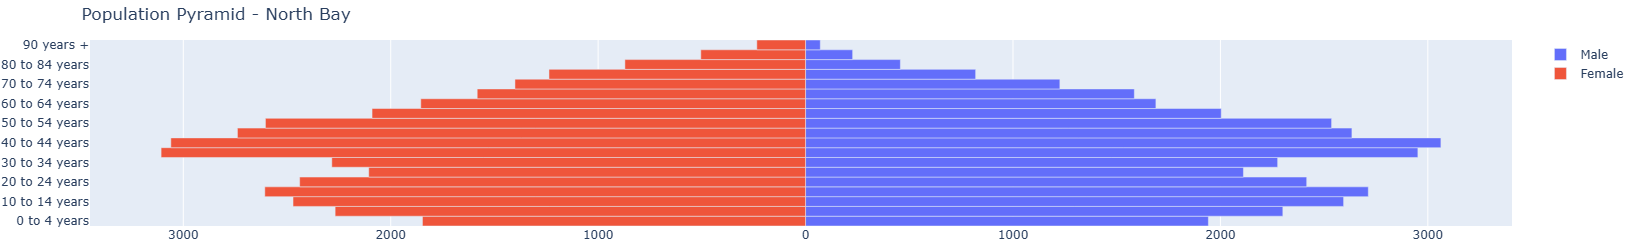

In [219]:
y_age = df_dg['Age group'].unique()
x_Male = df_dg['VALUE'].loc[(df_dg['Gender']=='Men+')]
x_Female = df_dg['VALUE'].loc[(df_dg['Gender']=='Women+')] * -1
fig= go.Figure()
fig.add_trace(go.Bar(y =  y_age, x=x_Male, name = 'Male', orientation= 'h', ))
fig.add_trace(go.Bar(y =  y_age, x=x_Female, name = 'Female', orientation= 'h', ))
fig.update_layout(title='Population Pyramid - North Bay',
                  barmode = 'relative', 
                  bargap = 0.0, bargroupgap = 0, 
                  xaxis = dict(tickvals = [-3000, -2000, -1000, 
                                           0, 1000, 2000, 3000], 
                                
                              ticktext = ['3000', '2000', '1000', '0',  
                                          '1000', '2000', '3000'], 
                                
                              # title = 'Population', 
                              # title_font_size = 10
                              ),
                  width=990,
                  height=243,
                  margin=dict(l=1, r=1, t=40, b=1),
                 ) 
  
fig.show()

In [220]:
#Import Data from Stats Canada
df = sc.table_to_df("14-10-0137-01") # Count of Persons claiming EI per week
df.rename(columns = {'REF_DATE':'Date'}, inplace=True)
df_ei = df.loc[(df['GEO'].isin(getLocation)) & (df['Age group'] == '15 years and over')]
df_ei.rename(columns = {'VALUE':'Claimants'}, inplace=True)
df = sc.table_to_df("14-10-0391-01") # Labour force characteristics by year for 5 years
df.rename(columns = {'REF_DATE':'Date'}, inplace=True)
df_lf= df.loc[df['GEO'].isin((getLocation))]
df = sc.table_to_df("11-10-0072-01") # Wages Salearies and  commissions of tax filers by sex and age group
df.rename(columns = {'REF_DATE':'Date'}, inplace=True)
df_ws= df.loc[(df['GEO'].isin(getLocation)) & (df['Age group']=='Ages 15 years and over')]
df=''

C:\Users\johna\AppData\Local\Temp\ipykernel_133056\3257056526.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [135]:
#set up drop lists 
sex_list = df_ei['Sex'].unique().tolist()
beneficiary_list = df_ei['Beneficiary detail'].unique().tolist()
characteristic_list= df_lf['Labour force characteristics'].unique().tolist()
age_group_list = df_ei['Age group'].unique().tolist()
income_statistic_list = df_ws['Statistics'].unique().tolist()
beneficiary_list



['All types of income benefits',
 'Regular benefits',
 'Regular benefits with declared earnings',
 'Regular benefits without declared earnings']

In [114]:
UOM = df_ws[['Statistics', 'UOM']]
UOM=UOM.drop_duplicates()
# mytable.set_index(['Statistics', 'UOM'], inplace=True)

In [115]:
UOM=UOM.rename(columns={'Statistics':'Measure'})

In [116]:
temp_df=df_lf[['Labour force characteristics', 'UOM']]
temp_df=temp_df.drop_duplicates()
temp_df=temp_df.rename(columns={'Labour force characteristics':'Measure'})
temp_df

,Measure,UOM
136,Population,Persons
137,Labour force,Persons
138,Employment,Persons
139,Unemployment,Persons
140,Not in labour force,Persons
141,Unemployment rate,Percentage
142,Participation rate,Percentage
143,Employment rate,Percentage


In [117]:
UOM=pd.concat([UOM, temp_df], ignore_index = True)
UOM

,Measure,UOM
0,"Count of tax filers with wages, salaries and commissions",Number
1,"Percentage of tax filers with wages, salaries and commissions",Percent
2,"25th percentile of wages, salaries and commissions",Dollars
3,"Median wages, salaries and commissions",Dollars
4,"75th percentile of wages, salaries and commissions",Dollars
5,Median total income,Dollars
6,Population,Persons
7,Labour force,Persons
8,Employment,Persons
9,Unemployment,Persons


In [118]:
beneficiary_list = df_ei['Beneficiary detail'].unique().tolist()

In [119]:
df_ei.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3492 entries, 10920 to 6003557
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                3492 non-null   datetime64[ns]
 1   GEO                 3492 non-null   category      
 2   DGUID               3492 non-null   category      
 3   Beneficiary detail  3492 non-null   object        
 4   Sex                 3492 non-null   category      
 5   Age group           3492 non-null   category      
 6   UOM                 3492 non-null   category      
 7   UOM_ID              3492 non-null   category      
 8   SCALAR_FACTOR       3492 non-null   category      
 9   SCALAR_ID           3492 non-null   category      
 10  VECTOR              3492 non-null   category      
 11  COORDINATE          3492 non-null   category      
 12  Claimants           3492 non-null   float64       
 13  STATUS              0 non-null      category  

In [120]:
temp_df=df_ei[['Beneficiary detail', 'UOM']]
temp_df=temp_df.drop_duplicates()
temp_df=temp_df.replace(to_replace='Persons', value='Claimants')
temp_df=temp_df.rename(columns={'Beneficiary detail':'Measure'})
temp_df

C:\Users\johna\AppData\Local\Temp\ipykernel_133056\725738697.py:3: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



,Measure,UOM
10920,All types of income benefits,Claimants
10941,Regular benefits,Claimants
10962,Regular benefits with declared earnings,Claimants
10983,Regular benefits without declared earnings,Claimants


In [121]:
UOM=pd.concat([UOM, temp_df], ignore_index = True)
UOM

,Measure,UOM
0,"Count of tax filers with wages, salaries and commissions",Number
1,"Percentage of tax filers with wages, salaries and commissions",Percent
2,"25th percentile of wages, salaries and commissions",Dollars
3,"Median wages, salaries and commissions",Dollars
4,"75th percentile of wages, salaries and commissions",Dollars
5,Median total income,Dollars
6,Population,Persons
7,Labour force,Persons
8,Employment,Persons
9,Unemployment,Persons


In [122]:
characteristic_list

['Population',
 'Labour force',
 'Employment',
 'Unemployment',
 'Not in labour force',
 'Unemployment rate',
 'Participation rate',
 'Employment rate']

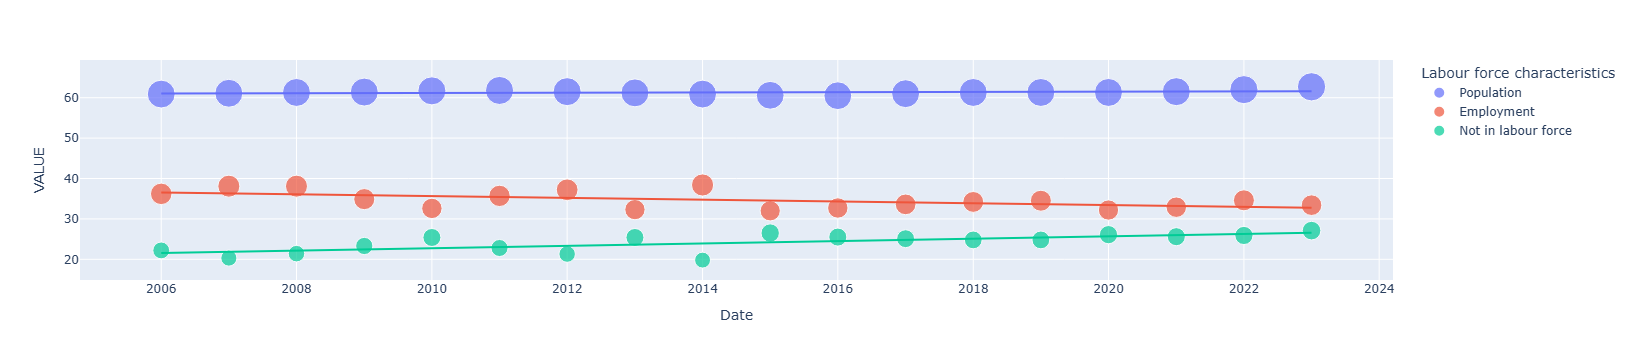

In [123]:

fig1 = px.scatter(df_lf.loc[(df_lf['Labour force characteristics'].isin(['Employment', 'Population', 'Not in labour force']))] , x='Date', y='VALUE', size='VALUE', color='Labour force characteristics', trendline='ols')
fig1.show()

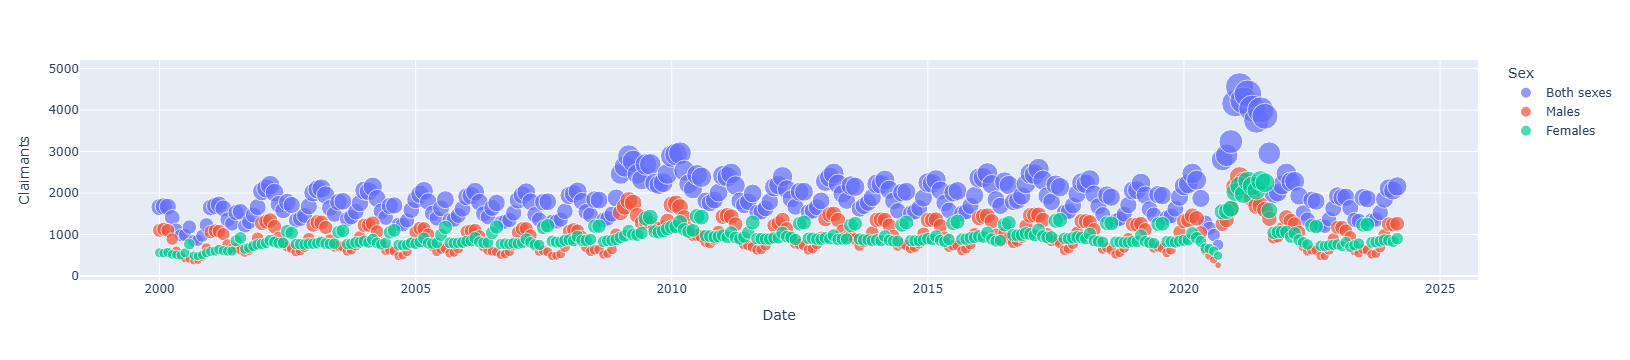

In [131]:
fig2 = px.scatter(df_ei[(df_ei['Age group']==age_group_list[0]) & 
        # (df_ei['Sex']==sex_list[0]) & 
        (df_ei['Beneficiary detail'] == beneficiary_list[0])], x='Date', y='Claimants', color='Sex', size='Claimants')
fig2.show()

In [139]:
sex_list

['Both sexes', 'Males', 'Females']

In [72]:
df_ws

,Date,GEO,DGUID,Sex,Age group,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
14256,2017-01-01,"North Bay, Ontario",2021S0504575,Both sexes,Ages 15 years and over,"Count of tax filers with wages, salaries and commissions",Number,223,units,0,v1121101095,100.1.1.1,33540.0,NaN,NaN,NaN,0
14257,2017-01-01,"North Bay, Ontario",2021S0504575,Both sexes,Ages 15 years and over,"Percentage of tax filers with wages, salaries and commissions",Percent,239,units,0,v1121101096,100.1.1.2,100.0,NaN,NaN,NaN,1
14258,2017-01-01,"North Bay, Ontario",2021S0504575,Both sexes,Ages 15 years and over,"25th percentile of wages, salaries and commissions",Dollars,81,units,0,v1121101097,100.1.1.3,12400.0,NaN,NaN,NaN,0
14259,2017-01-01,"North Bay, Ontario",2021S0504575,Both sexes,Ages 15 years and over,"Median wages, salaries and commissions",Dollars,81,units,0,v1121101098,100.1.1.4,34970.0,NaN,NaN,NaN,0
14260,2017-01-01,"North Bay, Ontario",2021S0504575,Both sexes,Ages 15 years and over,"75th percentile of wages, salaries and commissions",Dollars,81,units,0,v1121101099,100.1.1.5,61750.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148129,2022-01-01,"North Bay, Ontario",2021S0504575,Females,Ages 15 years and over,"Percentage of tax filers with wages, salaries and commissions",Percent,239,units,0,v1121101192,100.3.1.2,100.0,NaN,NaN,NaN,1
148130,2022-01-01,"North Bay, Ontario",2021S0504575,Females,Ages 15 years and over,"25th percentile of wages, salaries and commissions",Dollars,81,units,0,v1121101193,100.3.1.3,14900.0,NaN,NaN,NaN,0
148131,2022-01-01,"North Bay, Ontario",2021S0504575,Females,Ages 15 years and over,"Median wages, salaries and commissions",Dollars,81,units,0,v1121101194,100.3.1.4,37720.0,NaN,NaN,NaN,0
148132,2022-01-01,"North Bay, Ontario",2021S0504575,Females,Ages 15 years and over,"75th percentile of wages, salaries and commissions",Dollars,81,units,0,v1121101195,100.3.1.5,62770.0,NaN,NaN,NaN,0


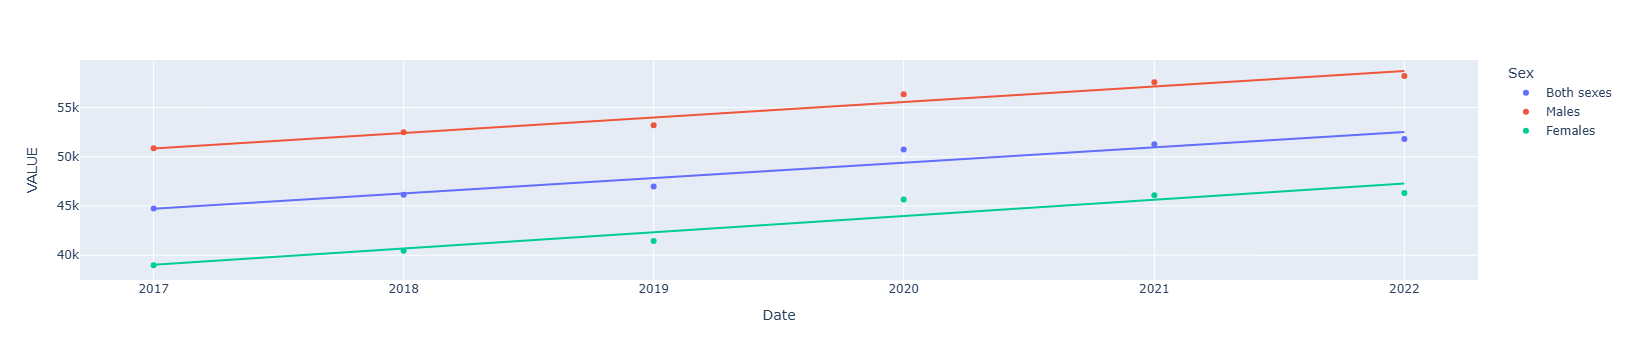

In [73]:
fig3 = px.scatter(df_ws.loc[(df_ws['Statistics']=='Median total income') 
               & (df_ws['Sex'].isin(['Both sexes', 'Males', 'Females']))], x='Date', y='VALUE', color='Sex', trendline="ols")
fig3.show()

In [74]:
df_lf

,Date,GEO,DGUID,Labour force characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
136,2006-01-01,"North Bay, Ontario",2016S0504575,Population,Persons,249,thousands,3,v1235071884,19.1,60.9,NaN,NaN,NaN,1
137,2006-01-01,"North Bay, Ontario",2016S0504575,Labour force,Persons,249,thousands,3,v1235071885,19.2,38.7,NaN,NaN,NaN,1
138,2006-01-01,"North Bay, Ontario",2016S0504575,Employment,Persons,249,thousands,3,v1235071886,19.3,36.2,NaN,NaN,NaN,1
139,2006-01-01,"North Bay, Ontario",2016S0504575,Unemployment,Persons,249,thousands,3,v1235071887,19.4,2.5,NaN,NaN,NaN,1
140,2006-01-01,"North Bay, Ontario",2016S0504575,Not in labour force,Persons,249,thousands,3,v1235071888,19.5,22.2,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,2023-01-01,"North Bay, Ontario",2016S0504575,Unemployment,Persons,249,thousands,3,v1235071887,19.4,2.1,NaN,NaN,NaN,1
4084,2023-01-01,"North Bay, Ontario",2016S0504575,Not in labour force,Persons,249,thousands,3,v1235071888,19.5,27.1,NaN,NaN,NaN,1
4085,2023-01-01,"North Bay, Ontario",2016S0504575,Unemployment rate,Percentage,242,units,0,v1235071889,19.6,5.9,NaN,NaN,NaN,1
4086,2023-01-01,"North Bay, Ontario",2016S0504575,Participation rate,Percentage,242,units,0,v1235071890,19.7,56.8,NaN,NaN,NaN,1


In [75]:
df_ei['UOM'].unique().tolist()


['Persons']

In [245]:
app = Dash(__name__, external_stylesheets=[dbc.themes.SIMPLEX])
myTitle = 'Labour Market in North Bay Ontario'
app.title = myTitle
# fig = go.Figure(
#     go.Scattergl(x=np.random.randn(1000),
#                  y=np.random.randn(1000),
#                  mode='markers',
#                  marker=dict(
#                      color=random.sample(['#ecf0f1'] * 500 +
#                                          ["#3498db"] * 500, 1000),
#                      line_width=1)
#                 ))

# fig.update_layout(plot_bgcolor='#ffffff',
#                   width=790,
#                   height=730,
#                   xaxis_visible=False,
#                   yaxis_visible=False,
#                   showlegend=False,
#                   margin=dict(l=0, r=0, t=0, b=0))
# fig = px.scatter(df_ei[(df_ei['Age group']==age_group_list[0]) & 
#                  (df_ei['Sex'].isin(sex_list)) & 
#                  (df_ei['Beneficiary detail'] == beneficiary_list[0])], 
#                  x='Date', 
#                  y='Claimants', 
#                  color='Sex', 
#                  size='Claimants',
#                  labels={'Date':''},
#                  template='simple_white',
#                  width=990,
#                  height=243,
#                  # trendline='ols',
#                  title='EI Claimants')
y_age = df_dg['Age group'].unique()
x_Male = df_dg['VALUE'].loc[(df_dg['Gender']=='Men+') & (df_dg['Date'] == '2023-01-01')]
x_Female = df_dg['VALUE'].loc[(df_dg['Gender']=='Women+') & (df_dg['Date'] == '2023-01-01')] * -1
fig = go.Figure()
fig.add_trace(go.Bar(y =  y_age, x=x_Male, name = 'Male', orientation= 'h', ))
fig.add_trace(go.Bar(y =  y_age, x=x_Female, name = 'Female', orientation= 'h', ))
fig.update_layout(title='Population Pyramid - North Bay - 2023',
                  barmode = 'relative', 
                  bargap = 0.0, bargroupgap = 0, 
                  xaxis = dict(tickvals = [-3000, -2000, -1000, 
                                           0, 1000, 2000, 3000], 
                                
                              ticktext = ['3000', '2000', '1000', '0',  
                                          '1000', '2000', '3000'], 
                                
                              title = 'Persons', 
                              title_font_size = 14
                              ),
                  template='simple_white',
                  width=990,
                  height=243,
                  margin=dict(l=1, r=1, t=40, b=1),
                 ) 

fig1 = px.bar(df_lf.loc[(df_lf['Labour force characteristics'].isin(['Employment', 'Not in labour force', 'Unemployment']))],
                  x='Date',
                  y='VALUE',
                  title='Population by Employment Characteristic',
                  labels={'VALUE': 'Persons',
                         'Date':'Year',
                         'Labour force characteristics':'Characteristic'},
                  # size='VALUE',
                  template='simple_white',
                  width=990,
                  height=243,
                  color='Labour force characteristics',
                  # trendline='ols',
             )
fig2 = px.scatter(df_ws.loc[(df_ws['Statistics']=='Median total income') 
               & (df_ws['Sex'].isin(['Both sexes', 'Males', 'Females']))], 
                  template='simple_white', 
                  title = "Median Income in 000's",
                  x='Date', 
                  y='VALUE', 
                  labels = {'VALUE': '$,000s',
                           'Date':'Year',
                           'Sex':'Gender',
                           'Both sexes':'Average'},
                  width=990,
                  height=243,
                  color='Sex', 
                  trendline="ols")

fig.update_layout(margin=dict(l=1, r=1, t=40, b=1))
fig1.update_layout(
    # plot_bgcolor='#ffffff',
    margin=dict(l=1, r=1, t=40, b=1))
fig2.update_layout(margin=dict(l=1, r=1, t=40, b=1),
                  )
app.layout=dbc.Container([
    html.Div(
        [
            html.Div([
                html.H1([
                    html.Span("Welcome"),
                    html.Br(),
                    html.Span("to the North Bay Labour Market Dashboard!")
                ]),
                html.P("This Dashboard assists users in understanding the local labour market conditions.")
            ],
                     style={
                         "vertical-alignment": "top",
                         "height": 260
                     }),
            html.Div(
                [
                    html.Div(dbc.RadioItems(
                        className='btn-group',
                        inputClassName='btn-check',
                        labelClassName="btn btn-outline-light",
                        labelCheckedClassName="btn btn-light",
                        options=[
                            {"label": "Graph", "value": 1},
                            {"label": "Table", "value": 2}
                        ],
                        value=1
                        ),
                             style={'width': 206}
                    ),
                    html.Div(
                        dbc.Button(
                            "About",
                            className="btn btn-info",
                            n_clicks=0
                        ),
                        style={'width': 104})
                ],
                style={
                    'margin-left': 15,
                    'margin-right': 15,
                    'display': 'flex'
                }),
            html.Div(
                [
                    html.Div(
                        [
                            html.H2('Sex:'),
                            dcc.Dropdown(
                                options=sex_list,
                                value=1,
                                clearable=True,
                                multi=True,
                                optionHeight=40
                            )
                        ]
                    ),
                    html.Div(
                        [
                            html.H2('Statistic to Plot:'),
                            dcc.Dropdown(
                                options=UOM['Measure'],
                                value=1,
                                clearable=False,
                                multi=True,
                                optionHeight=40
                            )
                        ]
                    ),                    
                    html.Div(
                        [
                            html.H2('Income statistic:'),
                            dcc.Dropdown(
                                options=income_statistic_list,
                                value=income_statistic_list[0],
                                clearable=True,
                                multi=True,
                                optionHeight=40
                                
                            )
                        ]
                    )
            ],
                     style={
                         'margin-left': 15,
                         'margin-right': 15,
                         'margin-top': 30
                     }),
            
            html.Div(html.Img(src='assets/image.svg',
             style={
                 'margin-left': 15,
                 'margin-right': 15,
                 'margin-top': 30,
                 'width': 310,
                 'display':'flex'
             }
                             )
                    )
        ],
    style={
        'width': 340,
        'margin-left': 35,
        'margin-top': 35,
        'margin-bottom': 35
    }), 
    html.Div(
        [
            html.Div(dcc.Graph(figure=fig), style={'width': 990}),
            html.Div(dcc.Graph(figure=fig1), style={'width':990}),
            html.Div(dcc.Graph(figure=fig2), style={'width':990})
            # html.Div(
            #     [
            #         html.H2('Output 1:'),
            #         html.Div(className='Output'),
            #         html.H2('Output 2:'),
            #         html.Div(html.H3("Selected Value"), className='Output')
            #     ],
            #       style={'width': 200})
        ],
        
        style={
            'width': 990,
            'margin-top': 35,
            'margin-right': 35,
            'margin-bottom': 35,
            # 'display':'flex'
            }) 
    
], 
                         
   fluid = True,
   className='dashboard-container',
   style={'display':'flex'}
   )
if __name__ == "__main__":
    app.run_server(debug=True, port=8050)


